# LAB 8. PANDAS TIME SERIES ANALYSIS

## NAME : BALA MURUGAN P

## ROLL NO : 225229150

#### IMPORTING REQUIRED MODULES

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.show()

In [3]:
data = pd.read_csv('amazon_stock.csv')

#### INSPECT TOP 10 ROWS

In [4]:
data.head()

,None,ticker,Date,Open,High,Low,Close,Volume,Adj_Close
0,0,AMZN,3/27/2018,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
1,1,AMZN,3/26/2018,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2,2,AMZN,3/23/2018,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
3,3,AMZN,3/22/2018,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
4,4,AMZN,3/21/2018,1586.45,1590.00,1563.17,1581.86,4667291,1581.86


#### REMOVE UNWANTED COLUMNS

In [5]:
data = data.drop(['None','ticker'],axis=1)
data

,Date,Open,High,Low,Close,Volume,Adj_Close
0,3/27/2018,1572.40,1575.9600,1482.320,1497.0500,6793279,1497.0500
1,3/26/2018,1530.00,1556.9900,1499.250,1555.8600,5547618,1555.8600
2,3/23/2018,1539.01,1549.0200,1495.360,1495.5600,7843966,1495.5600
3,3/22/2018,1565.47,1573.8500,1542.400,1544.1000,6177737,1544.1000
4,3/21/2018,1586.45,1590.0000,1563.170,1581.8600,4667291,1581.8600
...,...,...,...,...,...,...,...
1311,01-08-2013,267.07,268.9800,263.567,266.3800,3010700,266.3800
1312,01-07-2013,262.97,269.7250,262.670,268.4592,4910000,268.4592
1313,01-04-2013,257.58,259.8000,256.650,259.1500,1874200,259.1500
1314,01-03-2013,257.27,260.8800,256.370,258.4800,2750900,258.4800


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1316 non-null   object 
 1   Open       1316 non-null   float64
 2   High       1316 non-null   float64
 3   Low        1316 non-null   float64
 4   Close      1316 non-null   float64
 5   Volume     1316 non-null   int64  
 6   Adj_Close  1316 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.1+ KB


#### INSPECT THE DATATYPES OF COLUMNS

In [7]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj_Close    float64
dtype: object

#### CONVERT 'DATE' STRING COLUMN INTO ACTUAL DATE OBJECT

In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1316 non-null   datetime64[ns]
 1   Open       1316 non-null   float64       
 2   High       1316 non-null   float64       
 3   Low        1316 non-null   float64       
 4   Close      1316 non-null   float64       
 5   Volume     1316 non-null   int64         
 6   Adj_Close  1316 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 72.1 KB


#### LET US CHECK OUR DATA ONCE AGAIN , WITH HEAD()

In [11]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj_Close
0,2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
1,2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2,2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
3,2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
4,2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291,1581.86


#### SET DATE OBJECT TO BE INDEX

In [12]:
data.set_index(['Date'],inplace = True)

In [13]:
data.head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291,1581.86


#### UNDERSTAND STOCK DATA

<AxesSubplot:title={'center':'Adjusted Closing Price'}, xlabel='Date'>

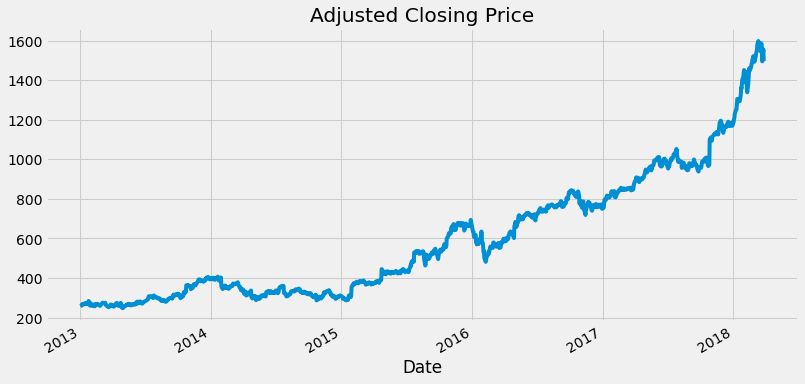

In [15]:
data['Adj_Close'].plot(figsize=(12,6),title='Adjusted Closing Price')

#### UNDERSTAND DATE TIMEINDEX

In [16]:
from datetime import datetime

In [17]:
my_year = 2020
my_month = 5
my_day = 1
my_hour = 13
my_minute = 36
my_second = 45
test_date = datetime(my_year,my_month,my_day)
test_date

datetime.datetime(2020, 5, 1, 0, 0)

#### FIND MINIMUM AND MAXIMUM DATES FROM DATA FRAME, CALL INFO() METHOD

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1316 entries, 2018-03-27 to 2013-01-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1316 non-null   float64
 1   High       1316 non-null   float64
 2   Low        1316 non-null   float64
 3   Close      1316 non-null   float64
 4   Volume     1316 non-null   int64  
 5   Adj_Close  1316 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 72.0 KB


In [20]:
print("Minimum Date : ",data.index.min())
print("Maximum date : ",data.index.max())

Minimum Date :  2013-01-02 00:00:00
Maximum date :  2018-03-27 00:00:00


#### RETRIEVE INDEX OF EARLIEST AND LATEST DATES USING ARGMIN AND ARGMAX

In [21]:
print("Minimum Date Location : ",data.index.argmin())

Minimum Date Location :  1315


In [22]:
print("Maximum date Location : ",data.index.argmax())

Maximum date Location :  0


### 1.RESAMPLING OPERATION

#### RESAMPLE DATA WITH YEAR END FREQUENCY ('Y') WITH AVERAGE STOCK PRICE

In [23]:
data.resample('Y').mean()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2013-12-31,297.877223,300.925966,294.656658,298.032235,2.967880e+06,298.032235
2014-12-31,332.798433,336.317462,328.545440,332.550976,4.083223e+06,332.550976
2015-12-31,478.126230,483.248272,472.875443,478.137321,3.797801e+06,478.137321
2016-12-31,699.669762,705.799103,692.646189,699.523135,4.122043e+06,699.523135
2017-12-31,967.565060,973.789752,959.991826,967.403996,3.466207e+06,967.403996
2018-12-31,1429.770000,1446.701017,1409.469661,1429.991186,5.586829e+06,1429.991186


#### PLOT A BAR CHART TO SHOW THE YEARLY ( USE 'A') MEAN ADJUSTED CLOSE PRICE

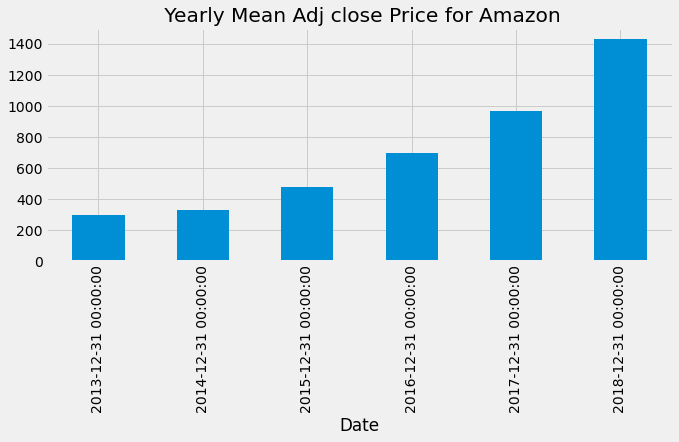

In [24]:
data['Adj_Close'].resample('A').mean().plot(kind = 'bar', figsize=(10,4))
plt.title(" Yearly Mean Adj close Price for Amazon")
plt.show()

#### PLOT BAR CHART TO SHOW MONTHLY MAXIMUM (USE 'MS') OPENING PRICE FOR ALL YEARS

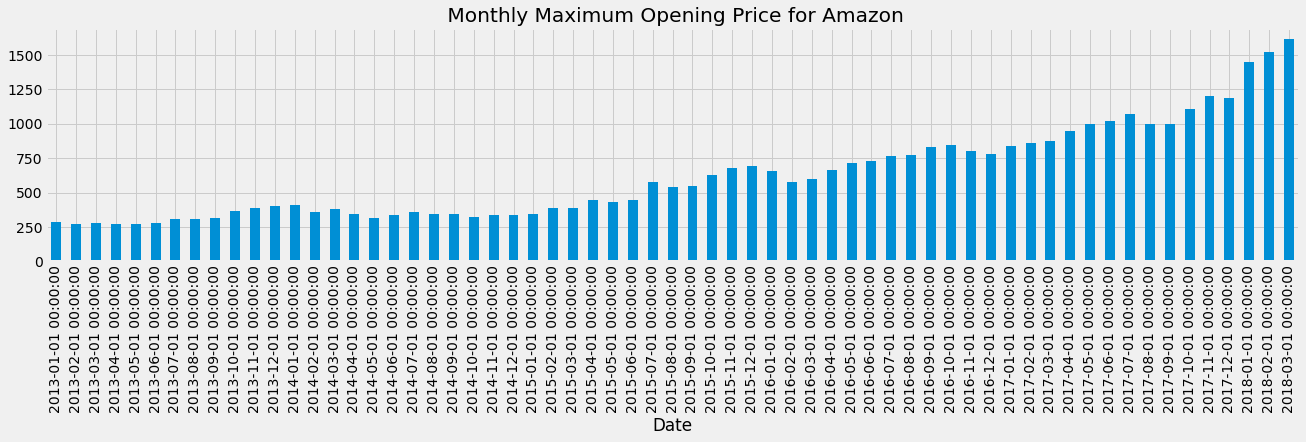

In [25]:
data['Open'].resample('MS').max().plot(kind = 'bar', figsize=(20,4))
plt.title(" Monthly Maximum Opening Price for Amazon")
plt.show()

#### PLOT BAR CHART OF QUATERLY (USE 'Q') AVERAGE VOLUME FOR ALL YEARS

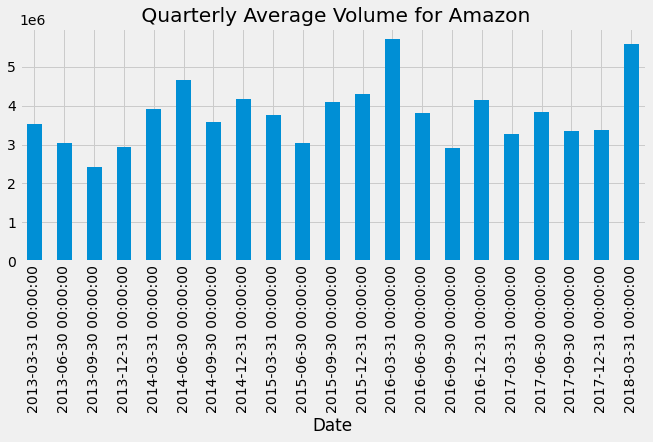

In [26]:
data['Volume'].resample('Q').mean().plot(kind = 'bar', figsize=(10,4))
plt.title(" Quarterly Average Volume for Amazon")
plt.show()

### 2. TIME SHIFTING OPERATIONS

#### SHIFTING DATA FORWARD AND BACKWARD

#### SHOW HEAD OF DATA

In [27]:
data.head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291,1581.86


#### SHIFT DATA BY 1 DAY FOWARD

In [29]:
data.shift(periods=1).head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26,1572.40,1575.96,1482.32,1497.05,6793279.0,1497.05
2018-03-23,1530.00,1556.99,1499.25,1555.86,5547618.0,1555.86
2018-03-22,1539.01,1549.02,1495.36,1495.56,7843966.0,1495.56
2018-03-21,1565.47,1573.85,1542.40,1544.10,6177737.0,1544.10


#### SHIFT DATA BY 1 DAY BACKWARD

In [30]:
data.shift(periods=-1).head()

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,1530.00,1556.99,1499.25,1555.86,5547618.0,1555.86
2018-03-26,1539.01,1549.02,1495.36,1495.56,7843966.0,1495.56
2018-03-23,1565.47,1573.85,1542.40,1544.10,6177737.0,1544.10
2018-03-22,1586.45,1590.00,1563.17,1581.86,4667291.0,1581.86
2018-03-21,1550.34,1587.00,1545.41,1586.51,4507049.0,1586.51


#### SHIFTING TIME INDEX

In [31]:
data.head(10)

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,1572.40,1575.96,1482.32,1497.05,6793279,1497.05
2018-03-26,1530.00,1556.99,1499.25,1555.86,5547618,1555.86
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966,1495.56
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737,1544.10
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291,1581.86
2018-03-20,1550.34,1587.00,1545.41,1586.51,4507049,1586.51
2018-03-19,1554.53,1561.66,1525.35,1544.93,6376619,1544.93
2018-03-16,1583.45,1589.44,1567.50,1571.68,5145054,1571.68
2018-03-15,1595.00,1596.91,1578.11,1582.32,4026744,1582.32


#### SHIFT TIME INDEX BY 3 MONTHS

In [32]:
data.shift(periods = 3,freq='MS')

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-06-01,1572.40,1575.9600,1482.320,1497.0500,6793279,1497.0500
2018-06-01,1530.00,1556.9900,1499.250,1555.8600,5547618,1555.8600
2018-06-01,1539.01,1549.0200,1495.360,1495.5600,7843966,1495.5600
2018-06-01,1565.47,1573.8500,1542.400,1544.1000,6177737,1544.1000
2018-06-01,1586.45,1590.0000,1563.170,1581.8600,4667291,1581.8600
...,...,...,...,...,...,...
2013-04-01,267.07,268.9800,263.567,266.3800,3010700,266.3800
2013-04-01,262.97,269.7250,262.670,268.4592,4910000,268.4592
2013-04-01,257.58,259.8000,256.650,259.1500,1874200,259.1500


#### APPICATION - COMPUTING RETURN ON INVESTMENT

C:\Users\1MSCDS~1\AppData\Local\Temp/ipykernel_7988/4237445623.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100* (data['Adj_Close'].tshift(periods = - 365, freq ='D')/data['Adj_Close']-1)


Text(0, 0.5, '% Return On Investment')

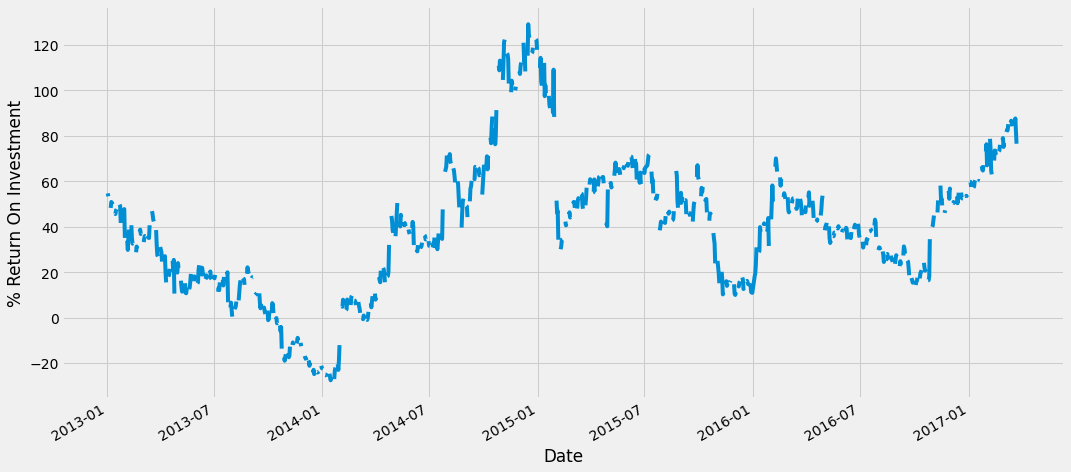

In [33]:
ROI = 100* (data['Adj_Close'].tshift(periods = - 365, freq ='D')/data['Adj_Close']-1)
ROI.plot(figsize=(16,8))
plt.ylabel('% Return On Investment')

#### ROLLING WINDOW OR MOVING WINDOW OPERATIONS

<AxesSubplot:xlabel='Date'>

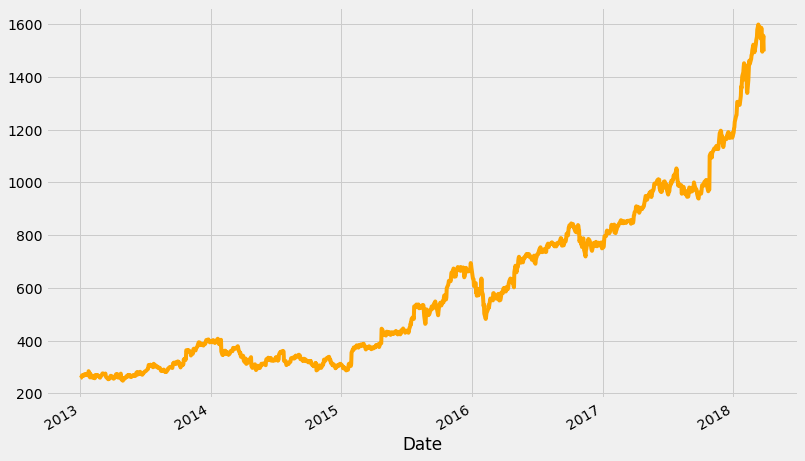

In [37]:
data['Adj_Close'].plot(figsize=(12,8), color='orange')

#### FIND ROLLIMG MEAN FOR 7 DAYS AND SHOW TOP 10 ROWS

In [38]:
data.rolling(7).mean().head(10)

,Open,High,Low,Close,Volume,Adj_Close
Date,,,,,,
2018-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-23,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-22,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-21,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-20,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-19,1556.885714,1570.640000,1521.894286,1543.695714,5.987651e+06,1543.695714
2018-03-16,1558.464286,1572.565714,1534.062857,1554.357143,5.752191e+06,1554.357143
2018-03-15,1567.750000,1578.268571,1545.328571,1558.137143,5.534923e+06,1558.137143


#### PLOT A LINE CHART FOR OPEN COLUMN FOLLOWED BY AVERAGE ROLLING WINDOW OF 30 DAYS DAYS ON THE SAME OPEN COLUMN

<AxesSubplot:xlabel='Date'>

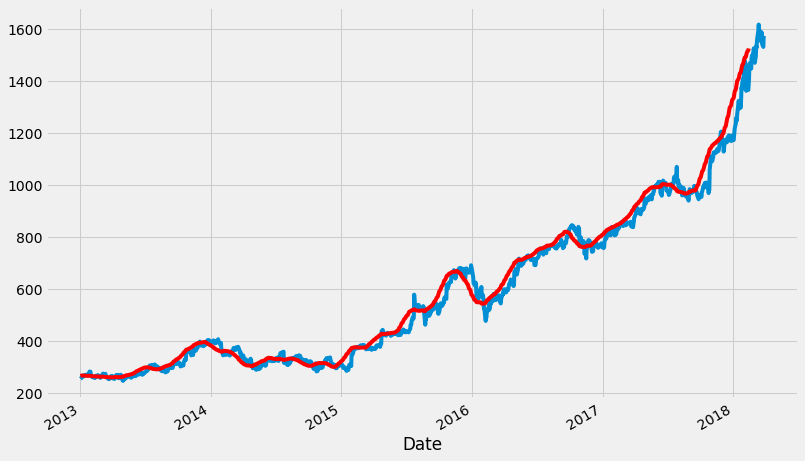

In [39]:
data['Open'].plot(figsize=(12,8))
data['Open'].rolling(30).mean().plot(figsize=(12,8), color='red')